# Part I : Investigate a Dataset of Medical Appointment in Brazil 

## Chukwuma Anthony Nwachukwu

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This dataset contains the medical appointment dataset of over 110,527 entries obtained from hosptitals in Brazil, it shows whether a patient shows for a appointment,features on the coditions those patient have and locations where those medical appointments where set to happen.

The dataset was obtained from [kaggle](https://www.kaggle.com/datasets/joniarroba/noshowappointments/download?datasetVersionNumber=5)

>We will be finding why most patients do not show up to their medical appointment

In [1]:
#Import libraries that will be used on the dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
# Load your data and print out a few lines
df=pd.read_csv("https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd2e9a_noshowappointments-kagglev2-may-2016/noshowappointments-kagglev2-may-2016.csv", parse_dates=['ScheduledDay','AppointmentDay'])

In [3]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
df.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572134e+12,5651768,F,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27 13:30:56+00:00,2016-06-07 00:00:00+00:00,54,MARIA ORTIZ,0,0,0,0,0,1,No


**Column Description:**

- **PatientId** - Identification of a patient

- **AppointmentID** - Identification of each appointment

- **Gender** - Male or Female . Female is the greater proportion, woman takes way more care of they health in comparison to man.

- **AppointmentDay**  - The day of the actuall appointment, when they have to visit the doctor.

- **ScheduleDay** - The day someone called or registered the appointment, this is before appointment of course.

- **Age** - How old is the patient.

- **Neighbourhood** - Where the appointment takes place.

- **Scholarship** - True of False if they have one or not

- **Hipertension** - True or False if they have one or not

- **Diabetes** - True or False if they have one or not

- **Alcoholism** - True or False if they have one or not

- **Handcap** - - 1 or more illness with 0= none and 4 meaning max

- **SMS_received** - True or False if they have one or not

- **No-Show** - True or False, if they have one or not.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No-show       

In [6]:
#rows and columns
df.shape

(110527, 14)

In [7]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [8]:
#Null values in dataframe
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [9]:
#Number of unique values
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [10]:
#Duplicates in dataframe
df.duplicated().sum()

0

>From what we can see so far, the dataset has a total of 110527 rows and 14 columns, with no null and duplicate values.


 ## Data Cleaning and Feature Engineering
 ### Cleaning issues
 - Renaming features and make it all lowercase
 - Changing dtypes of features to most suitable values
 - Dropping unnecessary feaures like appointmentid and patientid

 ### Feature Engineering
 - Create a new column that show the day difference between schedule and appointment date called days_before_appointment
 - Extract the day of the week from appointmentday feature
 - Creat column with certain ranges of days_before_appointment to represent certain time range variables

In [11]:
#Creating a copy
df_copy=df.copy()

In [12]:
#Renaming some columns to standard 
df_copy.rename(columns={'Hipertension':'hypertension','Handcap':'handicapped','ScheduledDay':'scheduled_date','AppointmentDay':'appointment_date','No-show':'no_show','Neighbourhood':'hospital_locations'},inplace=True)

In [13]:
#Confirming changes
df_copy.head(1)

,PatientId,AppointmentID,Gender,scheduled_date,appointment_date,Age,hospital_locations,Scholarship,hypertension,Diabetes,Alcoholism,handicapped,SMS_received,no_show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [14]:
# Renaming all columns and neighbourhood feature to a lowercase
df_copy.columns= df_copy.columns.str.lower()
df_copy.hospital_locations=df_copy.hospital_locations.str.lower()

In [15]:
#confirmation
df_copy.head(1)

,patientid,appointmentid,gender,scheduled_date,appointment_date,age,hospital_locations,scholarship,hypertension,diabetes,alcoholism,handicapped,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,jardim da penha,0,1,0,0,0,0,No


In [16]:
# coverting to datetime for features with datetime properties
df_copy['appointment_date'] = df_copy.appointment_date.dt.date
df_copy['scheduled_date'] = df_copy.scheduled_date.dt.date
df_copy['appointment_day'] = pd.to_datetime(df_copy['appointment_date']).dt.day_name()

In [17]:
# Confirming changes
df_copy

,patientid,appointmentid,gender,scheduled_date,appointment_date,age,hospital_locations,scholarship,hypertension,diabetes,alcoholism,handicapped,sms_received,no_show,appointment_day
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,jardim da penha,0,1,0,0,0,0,No,Friday
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,jardim da penha,0,0,0,0,0,0,No,Friday
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,mata da praia,0,0,0,0,0,0,No,Friday
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,pontal de camburi,0,0,0,0,0,0,No,Friday
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,jardim da penha,0,1,1,0,0,0,No,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03,2016-06-07,56,maria ortiz,0,0,0,0,0,1,No,Tuesday
110523,3.596266e+12,5650093,F,2016-05-03,2016-06-07,51,maria ortiz,0,0,0,0,0,1,No,Tuesday
110524,1.557663e+13,5630692,F,2016-04-27,2016-06-07,21,maria ortiz,0,0,0,0,0,1,No,Tuesday
110525,9.213493e+13,5630323,F,2016-04-27,2016-06-07,38,maria ortiz,0,0,0,0,0,1,No,Tuesday


In [18]:
# let's get the difference or date gap when someone is scheduled and the particular appointment day
df_copy['days_before_visit'] = df_copy['appointment_date'] - df_copy['scheduled_date']

In [19]:
# Confirming changes
df_copy

,patientid,appointmentid,gender,scheduled_date,appointment_date,age,hospital_locations,scholarship,hypertension,diabetes,alcoholism,handicapped,sms_received,no_show,appointment_day,days_before_visit
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,jardim da penha,0,1,0,0,0,0,No,Friday,0 days
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,jardim da penha,0,0,0,0,0,0,No,Friday,0 days
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,mata da praia,0,0,0,0,0,0,No,Friday,0 days
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,pontal de camburi,0,0,0,0,0,0,No,Friday,0 days
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,jardim da penha,0,1,1,0,0,0,No,Friday,0 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03,2016-06-07,56,maria ortiz,0,0,0,0,0,1,No,Tuesday,35 days
110523,3.596266e+12,5650093,F,2016-05-03,2016-06-07,51,maria ortiz,0,0,0,0,0,1,No,Tuesday,35 days
110524,1.557663e+13,5630692,F,2016-04-27,2016-06-07,21,maria ortiz,0,0,0,0,0,1,No,Tuesday,41 days
110525,9.213493e+13,5630323,F,2016-04-27,2016-06-07,38,maria ortiz,0,0,0,0,0,1,No,Tuesday,41 days


In [20]:
#Changing dtypes of some features to the most suitable
df_copy=df_copy.astype({'scholarship': bool, 'sms_received': bool,'alcoholism': bool, 'diabetes': bool, 'hypertension': bool})
df_copy[['gender','appointment_day']]=df_copy[['gender','appointment_day']].astype('category')
df_copy[['scheduled_date','appointment_date']] = df_copy[['scheduled_date','appointment_date']].apply(pd.to_datetime)
df_copy['days_before_visit'] = df_copy.days_before_visit.dt.days

In [21]:
#Confirming changes
df_copy.head(1)

,patientid,appointmentid,gender,scheduled_date,appointment_date,age,hospital_locations,scholarship,hypertension,diabetes,alcoholism,handicapped,sms_received,no_show,appointment_day,days_before_visit
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,jardim da penha,False,True,False,False,0,False,No,Friday,0


In [22]:
#Confirming that each feature dtype is in order
df_copy.dtypes

patientid                    float64
appointmentid                  int64
gender                      category
scheduled_date        datetime64[ns]
appointment_date      datetime64[ns]
age                            int64
hospital_locations            object
scholarship                     bool
hypertension                    bool
diabetes                        bool
alcoholism                      bool
handicapped                    int64
sms_received                    bool
no_show                       object
appointment_day             category
days_before_visit              int64
dtype: object

In [23]:
# creating a new features from cut days_before_visit feature 
day_range=[-7,-1,0,4,8,15,31,91,179] #bins
categories = ['Late','Same day','Short', 'Week','Fortnight','Month','Quarterly','Semester'] #string name
df_copy['day_range'] = pd.cut(df_copy.days_before_visit,day_range, labels=categories) #creating new column

In [24]:
#confirming changes
df_copy.head(5)

,patientid,appointmentid,gender,scheduled_date,appointment_date,age,hospital_locations,scholarship,hypertension,diabetes,alcoholism,handicapped,sms_received,no_show,appointment_day,days_before_visit,day_range
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,jardim da penha,False,True,False,False,0,False,No,Friday,0,Same day
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,jardim da penha,False,False,False,False,0,False,No,Friday,0,Same day
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,mata da praia,False,False,False,False,0,False,No,Friday,0,Same day
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,pontal de camburi,False,False,False,False,0,False,No,Friday,0,Same day
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,jardim da penha,False,True,True,False,0,False,No,Friday,0,Same day


In [25]:
# dropping two features that isn't useful to the analysis
df_copy.drop(['patientid','appointmentid'], axis=1, inplace= True)

In [26]:
#confirmation
df_copy

,gender,scheduled_date,appointment_date,age,hospital_locations,scholarship,hypertension,diabetes,alcoholism,handicapped,sms_received,no_show,appointment_day,days_before_visit,day_range
0,F,2016-04-29,2016-04-29,62,jardim da penha,False,True,False,False,0,False,No,Friday,0,Same day
1,M,2016-04-29,2016-04-29,56,jardim da penha,False,False,False,False,0,False,No,Friday,0,Same day
2,F,2016-04-29,2016-04-29,62,mata da praia,False,False,False,False,0,False,No,Friday,0,Same day
3,F,2016-04-29,2016-04-29,8,pontal de camburi,False,False,False,False,0,False,No,Friday,0,Same day
4,F,2016-04-29,2016-04-29,56,jardim da penha,False,True,True,False,0,False,No,Friday,0,Same day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,F,2016-05-03,2016-06-07,56,maria ortiz,False,False,False,False,0,True,No,Tuesday,35,Quarterly
110523,F,2016-05-03,2016-06-07,51,maria ortiz,False,False,False,False,0,True,No,Tuesday,35,Quarterly
110524,F,2016-04-27,2016-06-07,21,maria ortiz,False,False,False,False,0,True,No,Tuesday,41,Quarterly
110525,F,2016-04-27,2016-06-07,38,maria ortiz,False,False,False,False,0,True,No,Tuesday,41,Quarterly


In [27]:
df_copy.to_csv(r'no_show_cleaned.csv',index=False)

## Exploratory Data Analysis

## Univariate Exploration


### No_Show

In [28]:
pd.DataFrame(df_copy.no_show.value_counts())

,no_show
No,88208
Yes,22319


(Text(0.5, 1.0, 'Patients No_Show to Appointments'),)

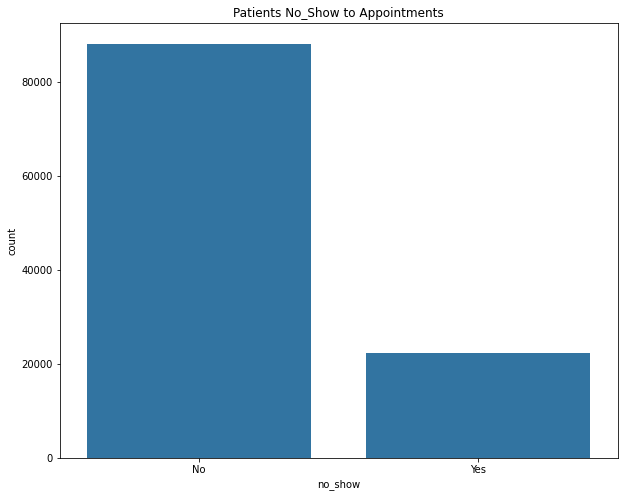

In [29]:
#creating color scheme
color=sns.color_palette()[0]
plt.figure(figsize=[10,8])
sns.countplot(data=df_copy, x='no_show',color=color)
plt.title('Patients No_Show to Appointments'),

**We can notice that on the no_show feature which is the main focus on this dataset shows that patients do show up for medical appointments far more than they don't**

### Age

In [30]:
# qualitative properties
df_copy.age.describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

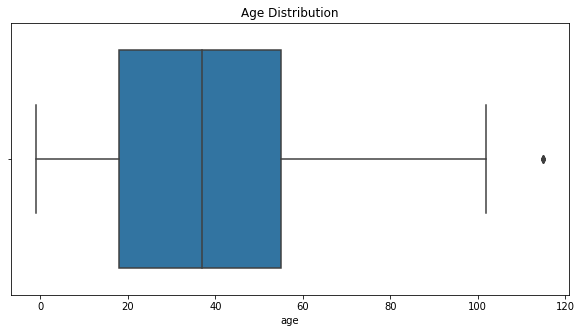

In [31]:
# Plot for Age
plt.figure(figsize=[10,5])
sns.boxplot(data=df_copy, x='age')
plt.title('Age Distribution');

**This shows the the distribution of the age feature with *mean age = 37.088874*, *min age = -1*, *25th percentile = 18*, *50th percentile = 37*, *75th percentile = 55* and *max age = 115***

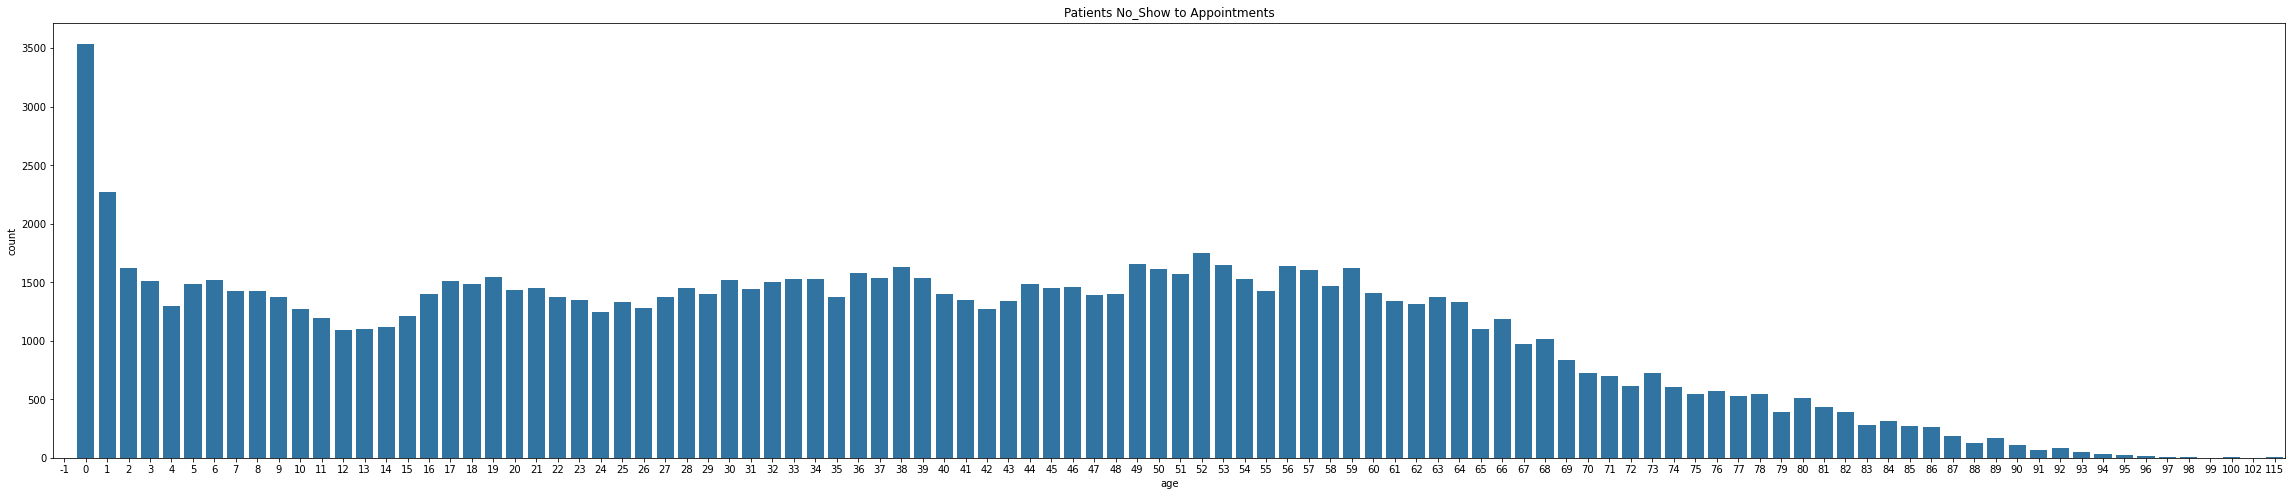

In [32]:
# Plot for Age Distribution
plt.figure(figsize=[40,8])
sns.countplot(data=df_copy,x='age',color=color)
plt.title('Patients No_Show to Appointments');

**This shows the value_counts of all ages on the dataset with *0* have the maximum count and *-1* having the least**

### Hospital_Locations

In [33]:
# value counts for hosptital location
hospital_locations_values=df_copy.hospital_locations.value_counts()
# location and maximum values 
hospital_locations_values.idxmax(),hospital_locations_values.max()

('jardim camburi', 7717)

In [34]:
# location and minimum value values 
hospital_locations_values.idxmin(),hospital_locations_values.min()

('parque industrial', 1)

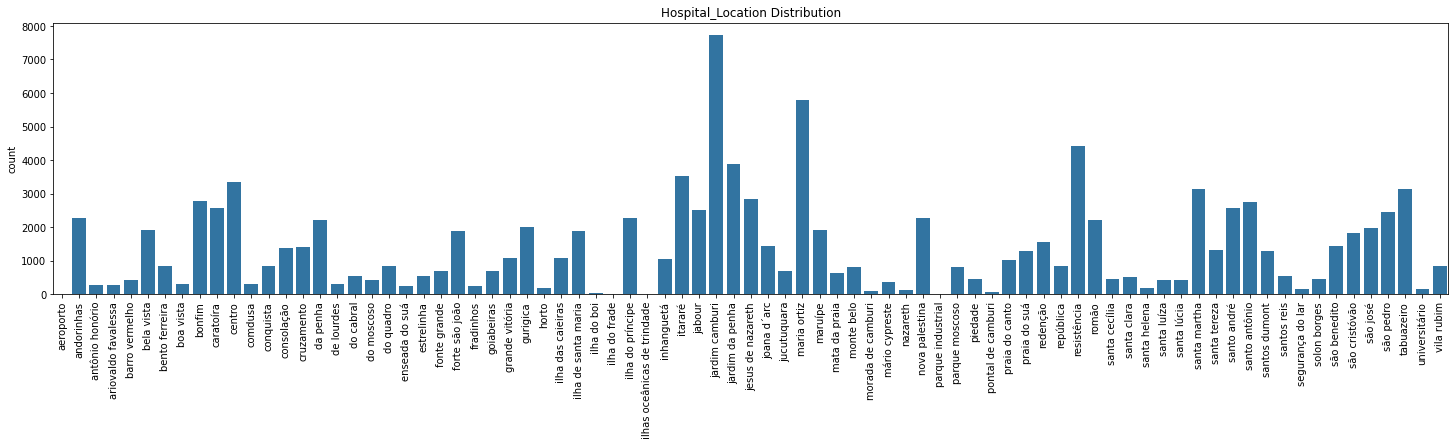

In [35]:
# Plot for hospital_locations Distribtution
plt.figure(figsize=[25,5])
sns.countplot(data=df_copy,x=np.sort(df_copy.hospital_locations),color=color)
plt.title('Hospital_Location Distribution')
plt.xticks(rotation=90);

**It is noticed that neighbourhood *jardim camburi* have the most patients going there and *parque industrial* has just one patient on the dataset**

### Gender

In [36]:
# value counts
df_copy.gender.value_counts()

F    71840
M    38687
Name: gender, dtype: int64

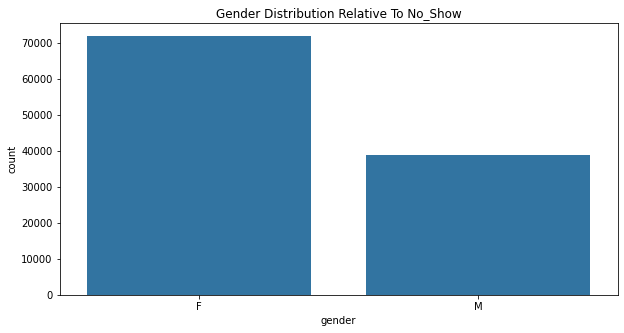

In [37]:
# Plot for Gender
plt.figure(figsize=(10,5))
sns.countplot(data=df_copy,x=df_copy.gender, color=color)
plt.title('Gender Distribution Relative To No_Show');

**Patients that are females have a higher count than males on the dataset**

### Scholarship

In [38]:
# value count for scholarship
df_copy.scholarship.value_counts()

False    99666
True     10861
Name: scholarship, dtype: int64

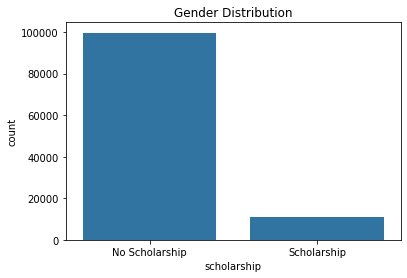

In [39]:
# Plot of scholarship
ax=sns.countplot(data=df_copy,x='scholarship', color=color)
x_ticks_labels=['No Scholarship', 'Scholarship']
ax.set_xticklabels(x_ticks_labels)
plt.title('Gender Distribution');

**Patients that don't have scholarships have a much larger value count compare to those that do**

### Sms_Recieved

In [40]:
# Value count for sms_recieved
df_copy.sms_received.value_counts()

False    75045
True     35482
Name: sms_received, dtype: int64

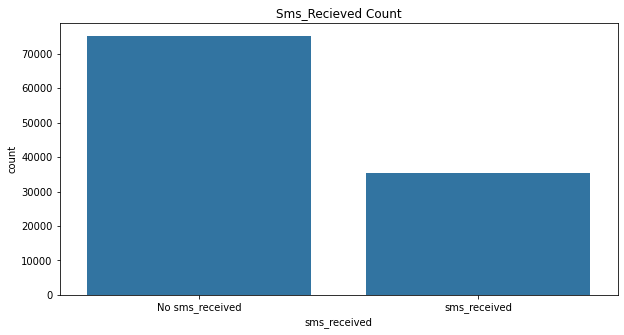

In [41]:
# Plot for sms_recieved Distribution
plt.figure(figsize=(10,5))
ax=sns.countplot(data=df_copy,x='sms_received', color=color)
x_ticks_labels=['No sms_received', 'sms_received']
ax.set_xticklabels(x_ticks_labels)
plt.title('Sms_Recieved Count');

**Patients that didn't recieve an sms have a much larger value count compare to those that did**

### Handicapped

In [42]:
# value counts for handicapped
df_copy.handicapped.value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: handicapped, dtype: int64

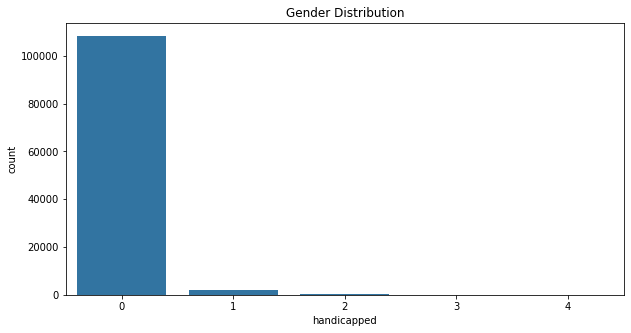

In [43]:
# Plot for handicapped Distribution
plt.figure(figsize=(10,5))
ax=sns.countplot(data=df_copy,x='handicapped', color=color)
plt.title('Gender Distribution');

**Patients are not Handicapped *0* have a bigger value count compare to those that do ranging from *1-4* with 4 being the most handicapped category**

### Diabetes

In [44]:
# value counts for diabetes
df_copy.diabetes.value_counts()

False    102584
True       7943
Name: diabetes, dtype: int64

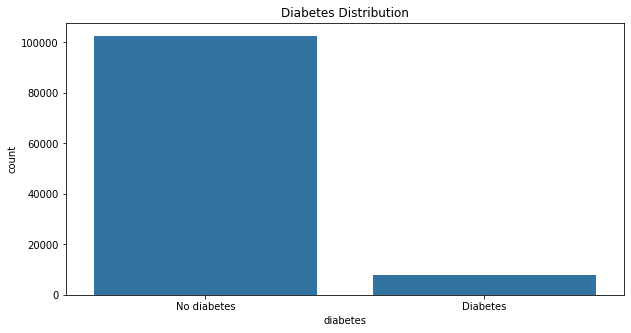

In [45]:
# Plot for Diabetes Distribution
plt.figure(figsize=(10,5))
ax=sns.countplot(data=df_copy,x='diabetes', color=color)
x_ticks_labels=['No diabetes', 'Diabetes']
ax.set_xticklabels(x_ticks_labels)
plt.title('Diabetes Distribution');

**Patients are not Diabetic have a bigger value count compare to those that do**

### Alcoholism

In [46]:
# Value count for alcoholism
df_copy.alcoholism.value_counts()

False    107167
True       3360
Name: alcoholism, dtype: int64

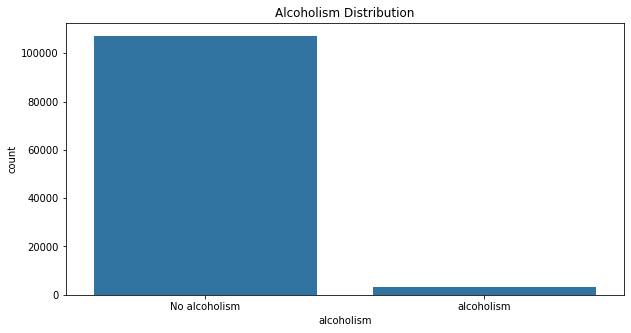

In [47]:
# Plot for Alcoholism Distribution
plt.figure(figsize=(10,5))
ax=sns.countplot(data=df_copy,x='alcoholism', color=color)
x_ticks_labels=['No alcoholism', 'alcoholism']
ax.set_xticklabels(x_ticks_labels)
plt.title('Alcoholism Distribution');

**Patients that don't have Alcoholism have a bigger value count compare to those that do**

### Hypertension

In [48]:
# value count for Hypertension
df_copy.hypertension.value_counts()

False    88726
True     21801
Name: hypertension, dtype: int64

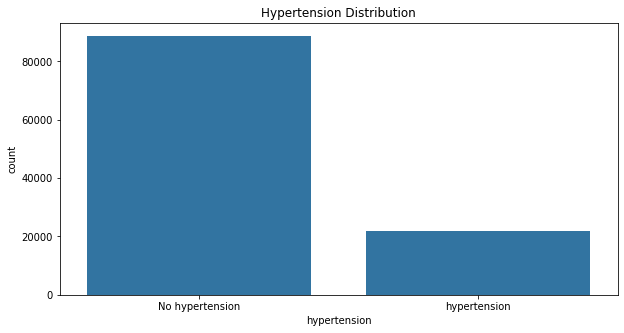

In [49]:
# Plot for Hypertension
plt.figure(figsize=(10,5))
ax=sns.countplot(data=df_copy,x='hypertension', color=color)
x_ticks_labels=['No hypertension', 'hypertension']
ax.set_xticklabels(x_ticks_labels)
plt.title('Hypertension Distribution');

**Patients that don't have Hypertension have a higher count than patients that do have the Hypertension illness**

### Appointment_Day

In [50]:
# value counts for Appointment_day
df_copy.appointment_day.value_counts()

Wednesday    25867
Tuesday      25640
Monday       22715
Friday       19019
Thursday     17247
Saturday        39
Name: appointment_day, dtype: int64

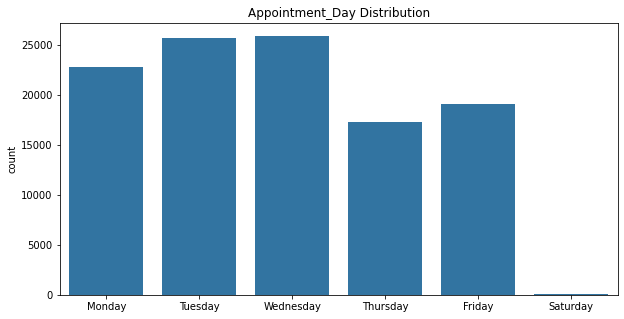

In [51]:
# order of Appointment_day
order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
# Plot for Appointment_day
plt.figure(figsize=(10,5))
ax=sns.countplot(data=df_copy,x=np.sort(df_copy.appointment_day), color=color, order=order)
plt.title('Appointment_Day Distribution');


**This also proves that appointment_days on *Wednesday* and *Tuesday* have the more counts whereas *Saturday* has the least value count**


**This also proves that appointment_days on *Wednesday* and *Tuesday* have the more counts whereas *Saturday* has the least value count**
### Day_range

In [52]:
# value counts for Day_Range
df_copy.day_range.value_counts()

Same day     38563
Short        19965
Month        16540
Week         14552
Fortnight    11196
Quarterly     9545
Semester       161
Late             5
Name: day_range, dtype: int64

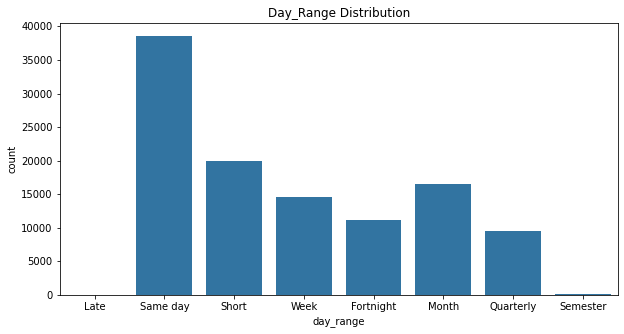

In [53]:
# Plot for Day_Range
plt.figure(figsize=(10,5))
ax=sns.countplot(data=df_copy,x='day_range', color=color)
plt.title('Day_Range Distribution');

**One can on observe that *Same_day* has more counts compared to *Semester* and *Late***

## Bivariate Exploration

**Exploring other feauture with respect to the independent categorical variable no_show**

### No_show (independent variable)


In [54]:
# percentage for show and noshow of patients to appointments
show = df_copy.groupby(['no_show']).size()[0]/(df_copy.groupby(['no_show']).size()[0]+df_copy.groupby(['no_show']).size()[1])
print("Percent of Patients who `Showed Up` => {:.2f}%".format(show*100))
noshow = df_copy.groupby(['no_show']).size()[1]/(df_copy.groupby(['no_show']).size()[0]+df_copy.groupby(['no_show']).size()[1])
print("Percent of Patients who Did `Not Showed Up` => {:.2f}%".format(noshow*100))

Percent of Patients who `Showed Up` => 79.81%
Percent of Patients who Did `Not Showed Up` => 20.19%


**We notice a warping 79.8% of patients show up for appointments while only 20.2% of them don't**

### Age

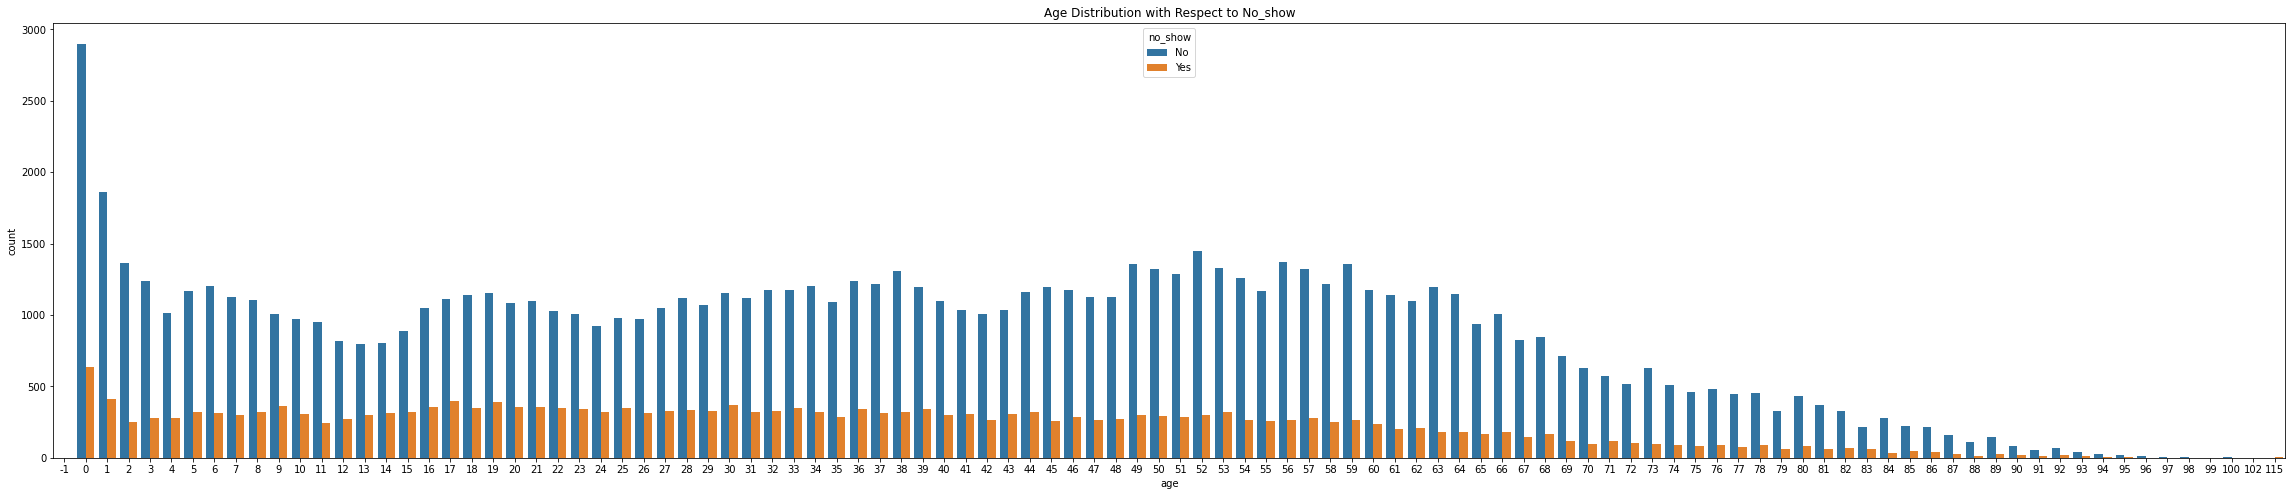

In [55]:
# Plot for Age with respect to no_show
plt.figure(figsize=(40,8))
sns.countplot(data=df_copy,x= 'age', hue='no_show')
plt.title('Age Distribution with Respect to No_show');

In [56]:
# patients not showing up for appointment and the location with the max values
no_show_yes=df_copy.query('no_show== "Yes"')['age'].value_counts()
no_show_yes.idxmax(),no_show_yes.max()

(0, 639)

In [57]:
#patients not showing up for appointment and the location with the min values
no_show_yes.idxmin(),no_show_yes.min()

(98, 1)

In [58]:
# patient showing up for appointment the age and the max values
no_show_no=df_copy.query('no_show== "No"')['age'].value_counts()
no_show_no.idxmax(),no_show_no.max()

(0, 2900)

In [59]:
#patients showing up for appointment and the location with the min values
no_show_no.idxmin(),no_show_no.min()

(99, 1)

\

**We can observe that age *0* has the max value count for patients that show and don't show up for medical appointments whereas ages *-1* and *>98* have the least value counts for the no_show feauture**

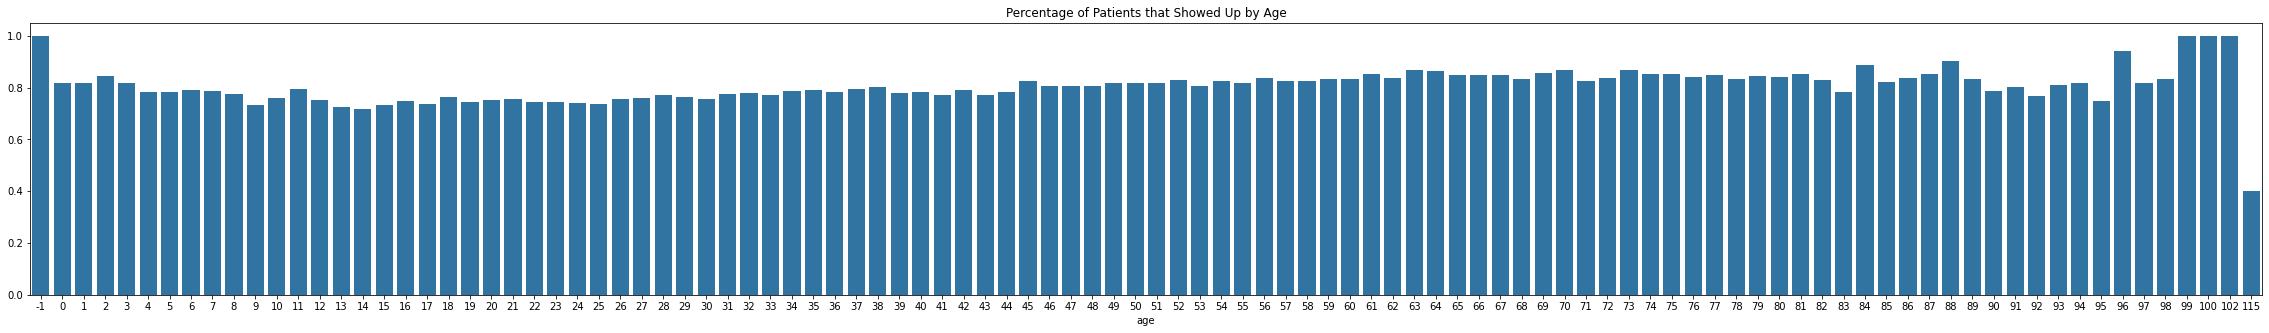

In [60]:
# Age_ratio Patients that showed up for appointment
age_ratio = (df_copy[df_copy.no_show == 'No'].groupby(['age']).size() / df_copy.groupby(['age']).size().sort_values(ascending=True))

plt.figure(figsize=(40,5))

# Plot for Age_ratio Patients that showed up for appointment
ax = sns.barplot(x=age_ratio.index, y=age_ratio, color=color)
ax.set_title("Percentage of Patients that Showed Up by Age")
plt.xticks(rotation=0)
plt.show();

In [61]:
# Age_ratio Patients that showed up for appointment
age_ratio

age
-1      1.000000
 0      0.819441
 1      0.817422
 2      0.844252
 3      0.816920
          ...   
 98     0.833333
 99     1.000000
 100    1.000000
 102    1.000000
 115    0.400000
Length: 104, dtype: float64

**One can noticed that patients of all ages have a high tendecy to show up for medical appointment with the most likely being age *-1* (antenatal treatment for a baby) and the least likely to show up for appointment is older patient with age *115***

### **Considering Hospital location**




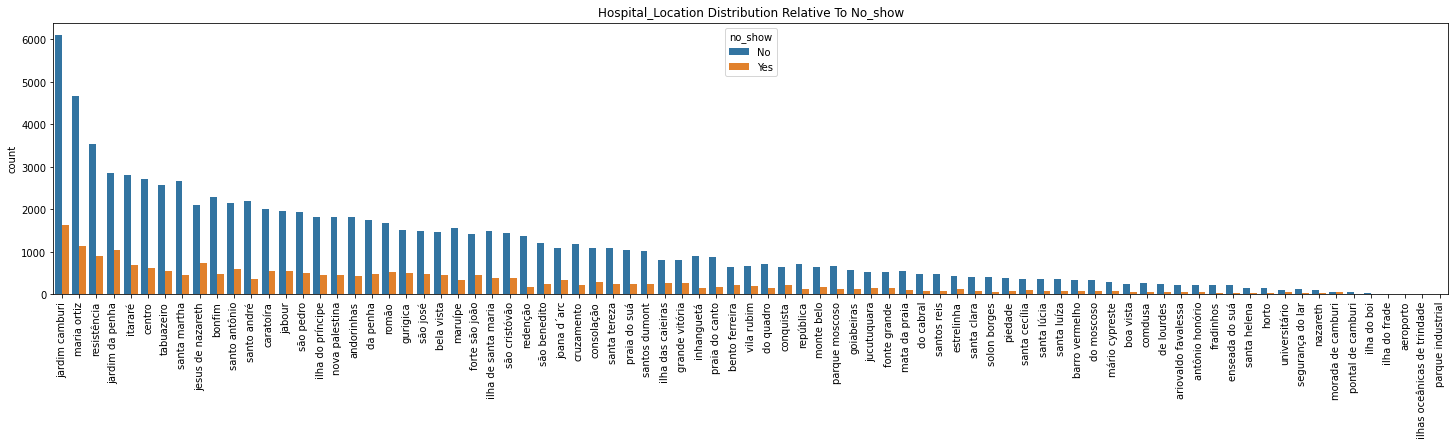

In [62]:
# Plot for hospital_locations wrt no_show
plt.figure(figsize=[25,5])
sns.countplot(data=df_copy,x=np.sort(df_copy.hospital_locations), hue='no_show', order=df_copy.hospital_locations.value_counts().index)
plt.title('Hospital_Location Distribution Relative To No_show')
plt.xticks(rotation=90);

In [63]:
# patients not showing up for appointment and the location with the max values
no_show_yes=df_copy.query('no_show== "Yes"')['hospital_locations'].value_counts()
no_show_yes.idxmax(),no_show_yes.max()

('jardim camburi', 1465)

In [64]:
#patients not showing up for appointment and the location with the min values
no_show_yes.idxmin(),no_show_yes.min()

('aeroporto', 1)

In [65]:
# patient showing up for appointment and the location with the max values
no_show_no=df_copy.query('no_show== "No"')['hospital_locations'].value_counts()
no_show_no.idxmax(),no_show_no.max()

('jardim camburi', 6252)

In [66]:
#patients showing up for appointment and the location with the min values
no_show_no.idxmin(),no_show_no.min()

('parque industrial', 1)

**The above show the hospital_locations value_counts based on the no_show feature, we can notice patients in *jardim camburi* hospital has the maximum count on the no_show feature on both showing and not showing up for appointment wheras *aeroporto* has the least patients not showing up and *parque industrial* has the minimum for those that do show up for appointments**

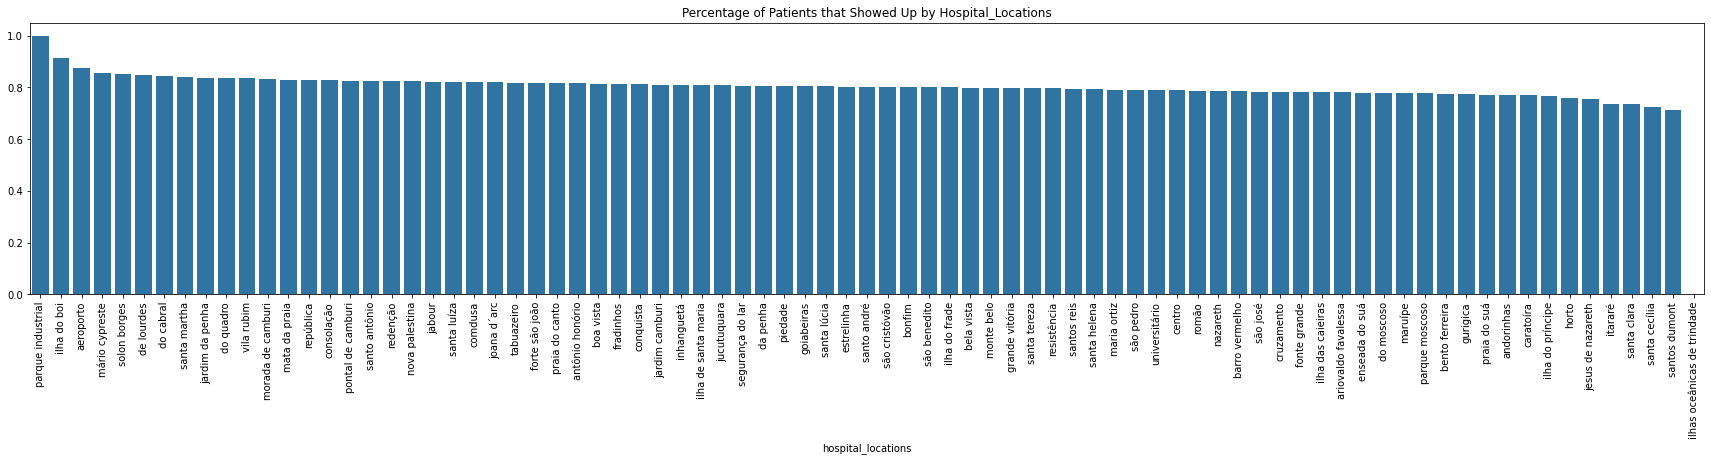

In [67]:
# hospital_locations_ratio for patients that showed up for appointment
hospital_locations_ratio = (df_copy[df_copy.no_show == 'No'].groupby(['hospital_locations']).size() / df_copy.groupby(['hospital_locations']).size()).sort_values(ascending=False)

plt.figure(figsize=(30,5))

# Plot for hospital_locations_ratio for patients that showed up for appointment
ax = sns.barplot(x=hospital_locations_ratio.index, y=hospital_locations_ratio, color=color)
ax.set_title("Percentage of Patients that Showed Up by Hospital_Locations")
plt.xticks(rotation=90)
plt.show();

In [68]:
# hospital_locations_ratio for patients that showed up for appointment
hospital_locations_ratio

hospital_locations
parque industrial              1.000000
ilha do boi                    0.914286
aeroporto                      0.875000
mário cypreste                 0.854447
solon borges                   0.852878
                                 ...   
itararé                        0.737336
santa clara                    0.735178
santa cecília                  0.725446
santos dumont                  0.710815
ilhas oceânicas de trindade         NaN
Length: 81, dtype: float64

In [69]:
# neighbouthood with the least tendency of patients to show up for an appointment
hospital_locations_ratio.idxmin()

'santos dumont'

In [70]:
# hospital_locations_ratio for patients that didn't showed up for appointment
hospital_locations_ratio_Yes = (df_copy[df_copy.no_show == 'Yes'].groupby(['hospital_locations']).size() / df_copy.groupby(['hospital_locations']).size()).sort_values(ascending=True)
hospital_locations_ratio_Yes

hospital_locations
ilha do boi                    0.085714
aeroporto                      0.125000
mário cypreste                 0.145553
solon borges                   0.147122
de lourdes                     0.154098
                                 ...   
santa clara                    0.264822
santa cecília                  0.274554
santos dumont                  0.289185
ilhas oceânicas de trindade    1.000000
parque industrial                   NaN
Length: 81, dtype: float64

**One can notice a bais on *parque industrial* since it has a lower value count on the dataset but those entries showed up for an appointment, it could mean that the patient had to be admitted from another location to the *parque industrial*,next to that on the most likely to show up for appointment is patients visiting *ilha do boi and aeroporto* hospitals and the least likely to show up for an appointment is *santos dumon***

### Gender

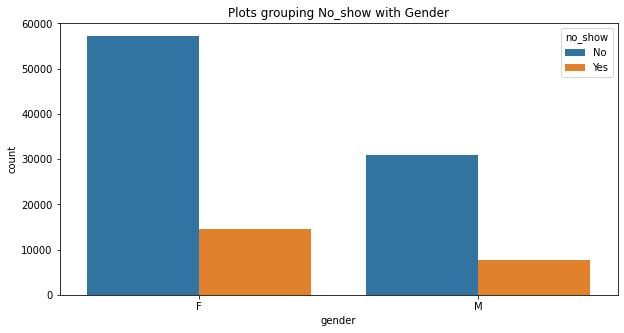

In [71]:
# Plot for gender wrt to no_show
plt.figure(figsize=(10,5))
sns.countplot(data = df_copy, x= 'gender',hue = 'no_show' )
plt.title('Plots grouping No_show with Gender');

**Here it is noticed that patients that are females have a larger value count on the show and no_show of medical appointments**

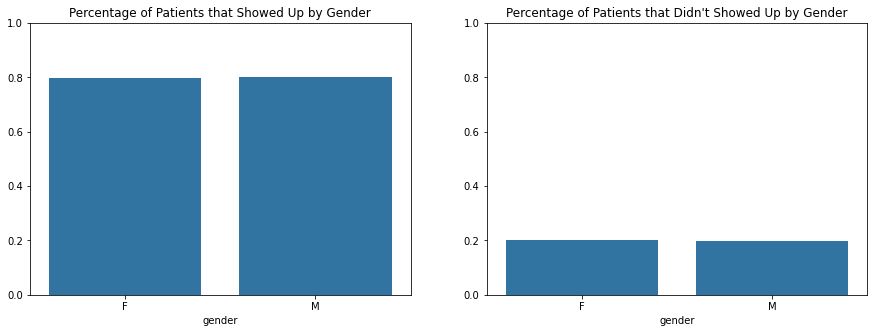

In [72]:
# Gender_ratio for patients that showed up for appointment
gender_ratio_No =  (df_copy[df_copy.no_show == 'No'].groupby(['gender']).size()  / df_copy.groupby(['gender']).size()).sort_values(ascending=True)
# Gender_ratio for patients that didn't showed up for appointment
gender_ratio_Yes = df_copy[df_copy.no_show == 'Yes'].groupby(['gender']).size() / df_copy.groupby(['gender']).size().sort_values(ascending=True)

plt.figure(figsize=(15,5))

# Plot for Gender_ratio for patients that showed up for appointment
plt.subplot(1,2,1)
ax = sns.barplot(x=gender_ratio_No.index, y=gender_ratio_No, color=color)
ax.set_title("Percentage of Patients that Showed Up by Gender")
ax.set_ylim(0,1)
plt.xticks(rotation=0)

# Plot for Gender_ratio for patients that didn't showed up for appointment
plt.subplot(1,2,2)
ax = sns.barplot(x=gender_ratio_Yes.index, y=gender_ratio_Yes, color=color)
ax.set_title("Percentage of Patients that Didn't Showed Up by Gender")
ax.set_ylim(0,1)
plt.xticks(rotation=0);

In [73]:
# Gender_ratio values for patients that show up for appointment
gender_ratio_No

gender
F    0.796854
M    0.800321
dtype: float64

In [74]:
# Gender_ratio values for patients that don't show up for appointment
gender_ratio_Yes

gender
F    0.203146
M    0.199679
dtype: float64

**Patients that are males have a higher tendency to show up to medical appointments than females but by a little value**

### Scholarship

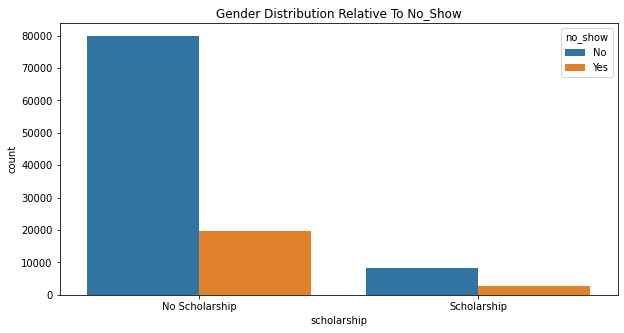

In [75]:
# Plot of scholarship wrt no_show
plt.figure(figsize=(10,5))
ax=sns.countplot(data=df_copy, x="scholarship", hue="no_show")
x_ticks_labels=['No Scholarship', 'Scholarship']
ax.set_xticklabels(x_ticks_labels)
plt.title('Gender Distribution Relative To No_Show');

**Patients that don't have scholarships have a much larger value count on the show and no_show**

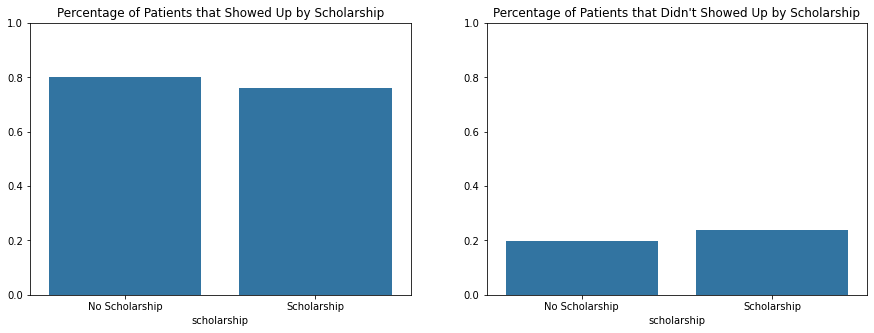

In [76]:
# scholarship_ratio for patients that show up for appointments
scholarship_ratio_No = (df_copy[df_copy.no_show == 'No'].groupby(['scholarship']).size()  / df_copy.groupby(['scholarship']).size()).sort_values(ascending=False)
# scholarship_ratio for patients that didn't show up for appointments
scholarship_ratio_Yes = (df_copy[df_copy.no_show == 'Yes'].groupby(['scholarship']).size()  / df_copy.groupby(['scholarship']).size()).sort_values(ascending=False)

plt.figure(figsize=(15,5))

# Plot for scholarship_ratio for patients that show up for appointments
plt.subplot(1,2,1)
ax = sns.barplot(x=scholarship_ratio_No.index, y=scholarship_ratio_No, color=color)
x_ticks_labels=['No Scholarship', 'Scholarship']
ax.set_xticklabels(x_ticks_labels)
ax.set_title("Percentage of Patients that Showed Up by Scholarship")
ax.set_ylim(0,1)
plt.xticks(rotation=0)

# Plot for scholarship_ratio for patients that show up for appointments
plt.subplot(1,2,2)
ax = sns.barplot(x=scholarship_ratio_Yes.index, y=scholarship_ratio_Yes, color=color)
x_ticks_labels=['No Scholarship', 'Scholarship']
ax.set_xticklabels(x_ticks_labels)
ax.set_title("Percentage of Patients that Didn't Showed Up by Scholarship")
ax.set_ylim(0,1)
plt.xticks(rotation=0);

In [77]:
# scholarship_ratio values for patients that show up for appointments
scholarship_ratio_No

scholarship
False    0.801928
True     0.762637
dtype: float64

In [78]:
# scholarship_ratio values for patients that didn't show up for appointments
scholarship_ratio_Yes

scholarship
True     0.237363
False    0.198072
dtype: float64

**We notice that patients show up for appointment regardless on if they have scholarships or not**

### Sms_Recieved

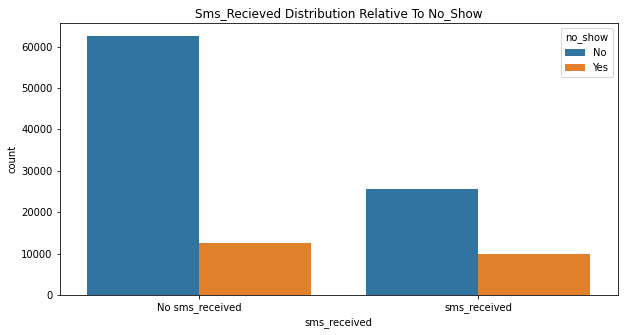

In [79]:
# Plot for sms_recieved wrt no_show
plt.figure(figsize=(10,5))
ax=sns.countplot(data=df_copy, x="sms_received", hue="no_show")
x_ticks_labels=['No sms_received', 'sms_received']
ax.set_xticklabels(x_ticks_labels)
plt.title('Sms_Recieved Distribution Relative To No_Show');

**Patients that didn't recieve an sms do show up more and at the same time have a higher value for not showing up as well**

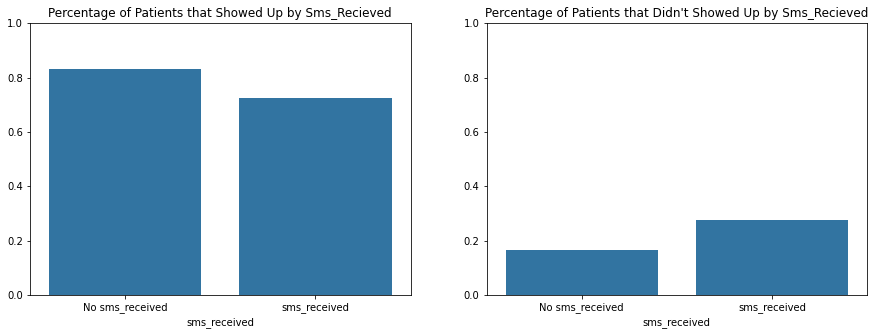

In [80]:
#sms_recieved ratio for patients that show up for appointments
sms_received_ratio_No = (df_copy[df_copy.no_show == 'No'].groupby(['sms_received']).size()  / df_copy.groupby(['sms_received']).size()).sort_values(ascending=False)
#sms_recieved ratio for patients that don't show up for appointments
sms_received_ratio_Yes = (df_copy[df_copy.no_show == 'Yes'].groupby(['sms_received']).size()  / df_copy.groupby(['sms_received']).size()).sort_values(ascending=False)

plt.figure(figsize=(15,5))

# plot sms_recieved ratio for patients that show up for appointments
plt.subplot(1,2,1)
ax = sns.barplot(x=sms_received_ratio_No.index, y=sms_received_ratio_No, color=color)
x_ticks_labels=['No sms_received', 'sms_received']
ax.set_xticklabels(x_ticks_labels)
ax.set_title("Percentage of Patients that Showed Up by Sms_Recieved")
ax.set_ylim(0,1)
plt.xticks(rotation=0)

# plot sms_recieved ratio for patients that Don't show up for appointments
plt.subplot(1,2,2)
ax= sns.barplot(x=sms_received_ratio_Yes.index, y=sms_received_ratio_Yes, color=color)
ax.x_ticks_labels=['No sms_received', 'sms_received']
ax.set_xticklabels(x_ticks_labels)
ax.set_title("Percentage of Patients that Didn't Showed Up by Sms_Recieved")
ax.set_ylim(0,1)
plt.xticks(rotation=0);

In [81]:
#sms_recieved ratio for patients that show up for appointments
sms_received_ratio_No

sms_received
False    0.832967
True     0.724255
dtype: float64

In [82]:
#sms_recieved ratio for patients that don't show up for appointments
sms_received_ratio_Yes

sms_received
True     0.275745
False    0.167033
dtype: float64

**We see that whether or not a patient recieves an sms doesn't have much effect if they show for an appointment because they show up eitherways**

### Handicapped

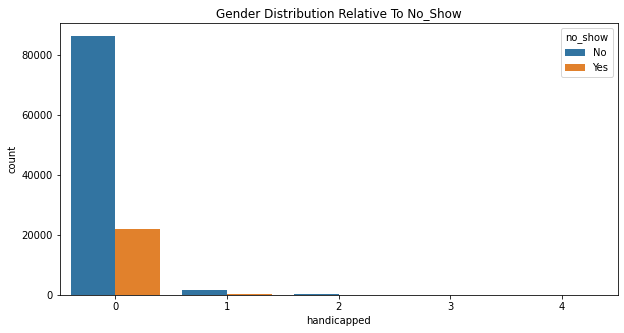

In [83]:
# Plot for handicapped wrt no_show
plt.figure(figsize=(10,5))
ax=sns.countplot(data=df_copy, x="handicapped", hue="no_show")
plt.title('Gender Distribution Relative To No_Show');

**Patients are not Handicapped as seen with category *0*  have a bigger value count on showing and not showing up for medical appointments**

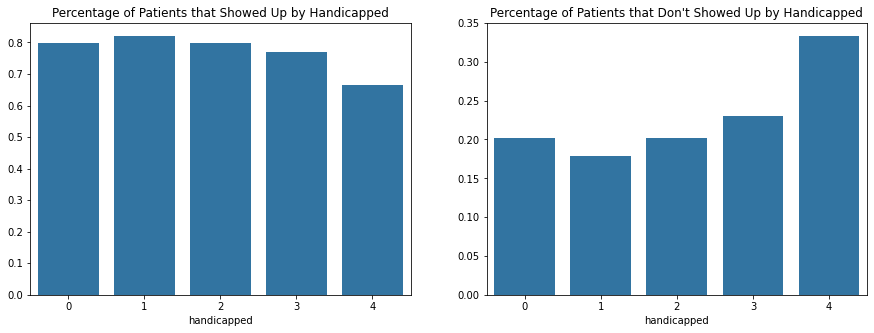

In [84]:
# handicapped_ratio for patients that show up for appoinment
handicapped_ratio = (df_copy[df_copy.no_show == 'No'].groupby(['handicapped']).size()  / df_copy.groupby(['handicapped']).size()).sort_values(ascending=False)
# handicapped_ratio for patients that don't show up for appoinment
handicapped_ratio_Yes = (df_copy[df_copy.no_show == 'Yes'].groupby(['handicapped']).size()  / df_copy.groupby(['handicapped']).size()).sort_values(ascending=False)

plt.figure(figsize=(15,5))

# plot for handicapped_ratio for patients that show up for appoinment
plt.subplot(1,2,1)
ax = sns.barplot(x=handicapped_ratio.index, y=handicapped_ratio, color=color)
ax.set_title("Percentage of Patients that Showed Up by Handicapped")
plt.xticks(rotation=0)

# plot for handicapped_ratio for patients that don't show up for appoinment
plt.subplot(1,2,2)
ax1 = sns.barplot(x=handicapped_ratio_Yes.index, y=handicapped_ratio_Yes, color=color)
ax1.set_title("Percentage of Patients that Don't Showed Up by Handicapped")
plt.xticks(rotation=0);

In [85]:
# handicapped_ratio for patients that show up for appoinment
handicapped_ratio

handicapped
1    0.820764
2    0.797814
0    0.797647
3    0.769231
4    0.666667
dtype: float64

In [86]:
# handicapped_ratio for patients that don't show up for appoinment
handicapped_ratio_Yes

handicapped
4    0.333333
3    0.230769
0    0.202353
2    0.202186
1    0.179236
dtype: float64

**Patients are in the handicapped category show a higher tendency to show for appouintment if they are not handicapped, it is also noticed that patients with *type 4* handicapped have the higher likely to not show up for an appointment out of all the other *Handicapped* levels ranging 0-4.**

### Diabetes

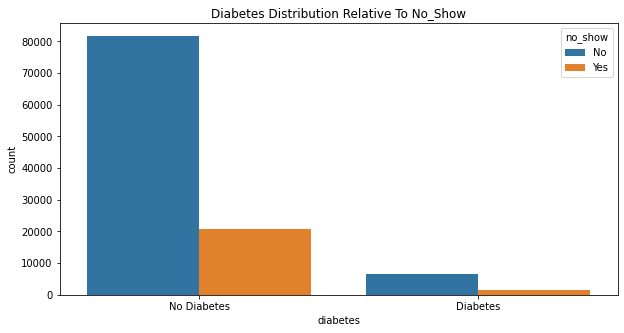

In [87]:
# Plot for Diabetes wrt No_show
plt.figure(figsize=(10,5))
ax=sns.countplot(data=df_copy, x="diabetes", hue="no_show")
x_ticks_labels=['No Diabetes', 'Diabetes']
ax.set_xticklabels(x_ticks_labels)
plt.title('Diabetes Distribution Relative To No_Show');

**Patients that don't have Diabetes have a bigger value count compare to those that do thus making *show* or *no_show* relative to that**

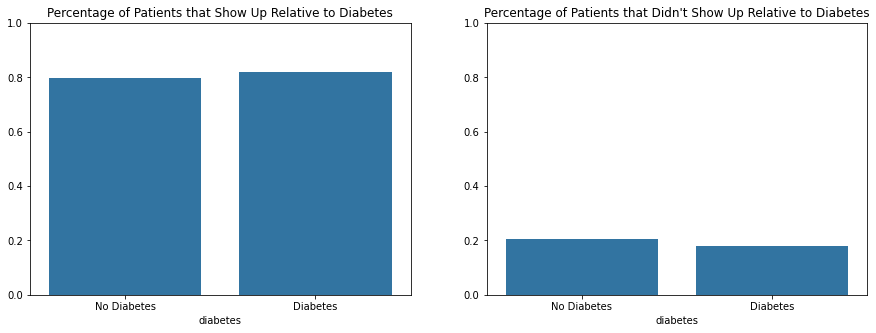

In [88]:
# Diabetes_ratio for patients that show up for appointment
diabetes_ratio = (df_copy[df_copy.no_show == 'No'].groupby(['diabetes']).size()  / df_copy.groupby(['diabetes']).size()).sort_values(ascending=False)
# Diabetes_ratio for pateints that don't show up for appointment
diabetes_ratio_Yes = (df_copy[df_copy.no_show == 'Yes'].groupby(['diabetes']).size()  / df_copy.groupby(['diabetes']).size()).sort_values(ascending=False)

plt.figure(figsize=(15,5))

# Plot for Diabetes_ratio for patients that show up for appointment
plt.subplot(1,2,1)
ax = sns.barplot(x=diabetes_ratio.index, y=diabetes_ratio, color=color)
x_ticks_labels=['No Diabetes', 'Diabetes']
ax.set_xticklabels(x_ticks_labels)
ax.set_title("Percentage of Patients that Show Up Relative to Diabetes")
ax.set_ylim(0,1)
plt.xticks(rotation=0);

# Plot for Diabetes_ratio for patients that show up for appointment
plt.subplot(1,2,2)
ax = sns.barplot(x=diabetes_ratio_Yes.index, y=diabetes_ratio_Yes, color=color)
x_ticks_labels=['No Diabetes', 'Diabetes']
ax.set_xticklabels(x_ticks_labels)
ax.set_title("Percentage of Patients that Didn't Show Up Relative to Diabetes")
ax.set_ylim(0,1)
plt.xticks(rotation=0);

It's obvious that pateints do show up for appointment whether they have diabetes or not.

In [89]:
# Diabetes_ratio for patients that show up for appointment
diabetes_ratio

diabetes
True     0.819967
False    0.796372
dtype: float64

In [90]:
# Diabetes_ratio for patients that didn't show up for appointment
diabetes_ratio_Yes

diabetes
False    0.203628
True     0.180033
dtype: float64

### Alcoholism

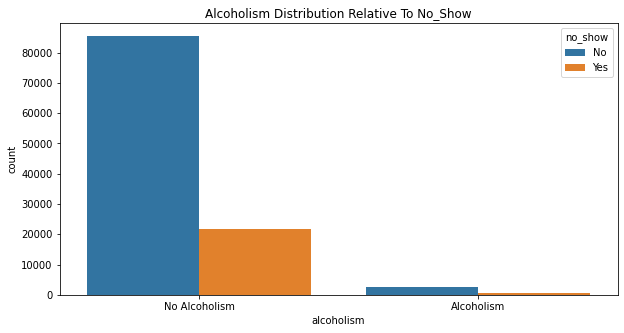

In [91]:
# Plot for Alcoholism Distribution relative to no_show
plt.figure(figsize=(10,5))
ax=sns.countplot(data=df_copy, x="alcoholism", hue="no_show")
x_ticks_labels=['No Alcoholism', 'Alcoholism']
ax.set_xticklabels(x_ticks_labels)
plt.title('Alcoholism Distribution Relative To No_Show');

**Patients that are not Alcoholics show up and don't show up for appointments more than those with Alcoholism**

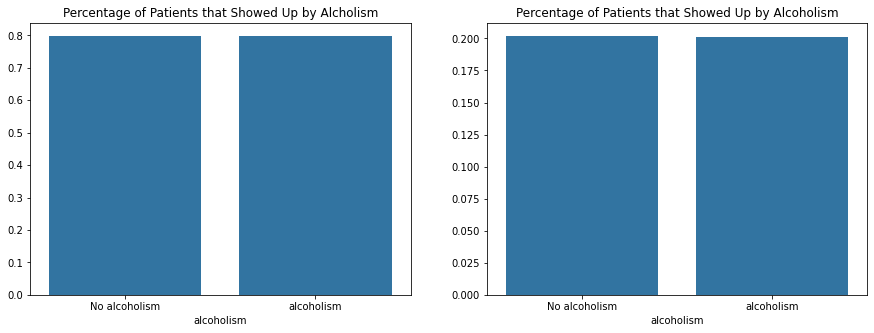

In [92]:
#alcoholism_ratio for patients that show up for appointment
alcoholism_ratio = (df_copy[df_copy.no_show == 'No'].groupby(['alcoholism']).size()  / df_copy.groupby(['alcoholism']).size()).sort_values(ascending=False)
#alcoholism_ratio for patients that didn't show up for appointment
alcoholism_ratio_Yes = (df_copy[df_copy.no_show == 'Yes'].groupby(['alcoholism']).size()  / df_copy.groupby(['alcoholism']).size()).sort_values(ascending=False)
plt.figure(figsize=(15,5))
# Plot alcoholism_ratio for patients that show up for appointment
plt.subplot(1,2,1)
ax = sns.barplot(x=alcoholism_ratio.index, y=alcoholism_ratio, color=color)
x_ticks_labels=['No alcoholism', 'alcoholism']
ax.set_xticklabels(x_ticks_labels)
ax.set_title("Percentage of Patients that Showed Up by Alcholism")
plt.xticks(rotation=0)

# Plot alcoholism_ratio for patients didnt that show up for appointment
plt.subplot(1,2,2)
ax = sns.barplot(x=alcoholism_ratio_Yes.index, y=alcoholism_ratio_Yes, color=color)
x_ticks_labels=['No alcoholism', 'alcoholism']
ax.set_xticklabels(x_ticks_labels)
ax.set_title("Percentage of Patients that Showed Up by Alcoholism")
plt.xticks(rotation=0);

In [93]:
# alcoholism_ratio for patients that show up for appointment
alcoholism_ratio

alcoholism
True     0.798512
False    0.798054
dtype: float64

In [94]:
#alcoholism_ratio for patients didnt that show up for appointment
alcoholism_ratio_Yes

alcoholism
False    0.201946
True     0.201488
dtype: float64

**Patients do show up for appointments more than they don't whether they are Alcoholics or not**

### Hypertension

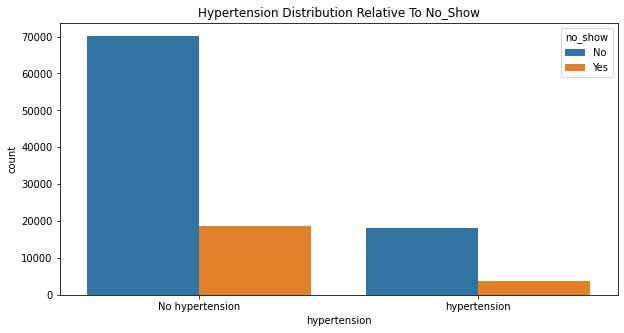

In [95]:
#Plot for Hypertension wrt no_show
plt.figure(figsize=(10,5))
ax=sns.countplot(data=df_copy, x="hypertension", hue="no_show")
x_ticks_labels=['No hypertension', 'hypertension']
ax.set_xticklabels(x_ticks_labels)
plt.title('Hypertension Distribution Relative To No_Show');

**Patients with hypertension do show up for appointments more and at the same time don't because of their higher counts**

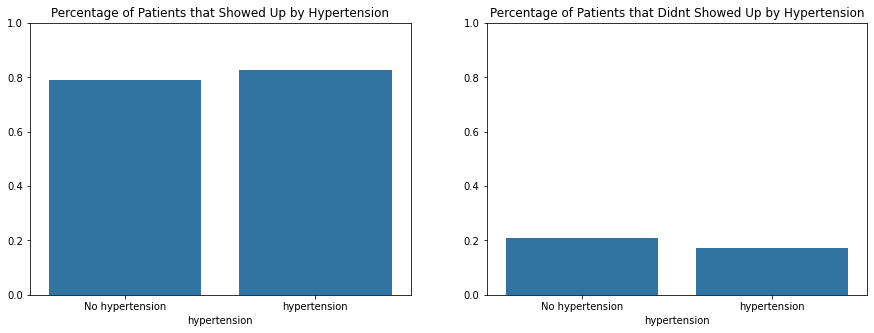

In [96]:
# Hypertension_ratio for patients that showed up for appointment
hypertension_ratio = (df_copy[df_copy.no_show == 'No'].groupby(['hypertension']).size()  / df_copy.groupby(['hypertension']).size()).sort_values(ascending=False)
# Hypertension_ratio for patients that didn't showed up for appointment
hypertension_ratio_Yes = (df_copy[df_copy.no_show == 'Yes'].groupby(['hypertension']).size()  / df_copy.groupby(['hypertension']).size()).sort_values(ascending=False)
plt.figure(figsize=(15,5))
# Plot for Hypertension_ratio for patients that showed up for appointment
plt.subplot(1,2,1)
ax = sns.barplot(x=hypertension_ratio.index, y=hypertension_ratio, color=color)
x_ticks_labels=['No hypertension', 'hypertension']
ax.set_xticklabels(x_ticks_labels)
ax.set_title("Percentage of Patients that Showed Up by Hypertension")
ax.set_ylim(0,1)
plt.xticks(rotation=0)

# Plot for Hypertension_ratio for patients that showed up for appointment
plt.subplot(1,2,2)
ax = sns.barplot(x=hypertension_ratio_Yes.index, y=hypertension_ratio_Yes, color=color)
x_ticks_labels=['No hypertension', 'hypertension']
ax.set_xticklabels(x_ticks_labels)
ax.set_title("Percentage of Patients that Didnt Showed Up by Hypertension")
ax.set_ylim(0,1)
plt.xticks(rotation=0);

**Patients do show up for appointments more than they don't whether they have hypertension or not**

In [97]:
# Hypertension_ratio for patients that showed up for appointment
hypertension_ratio

hypertension
True     0.826980
False    0.790963
dtype: float64

In [98]:
# Hypertension_ratio for patients that showed up for appointment
hypertension_ratio_Yes

hypertension
False    0.209037
True     0.173020
dtype: float64

### Appointment Day

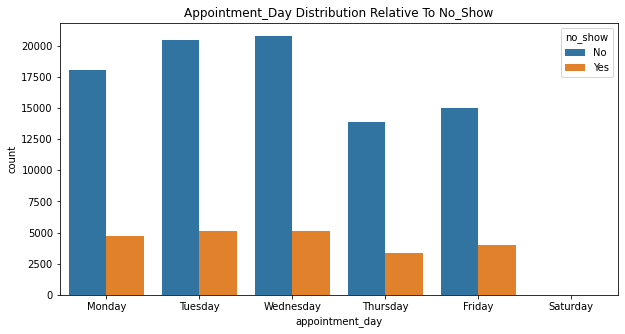

In [99]:
# Plot for Appointment_day wrt no_shpw
plt.figure(figsize=(10,5))
ax=sns.countplot(data=df_copy, x="appointment_day", hue="no_show",order=order)
plt.title('Appointment_Day Distribution Relative To No_Show');

**It shows that for Patients who have appointments scheduled on *Tuesday* and *Wednesday* have the highest value for showing up and not showing up to appointments.**


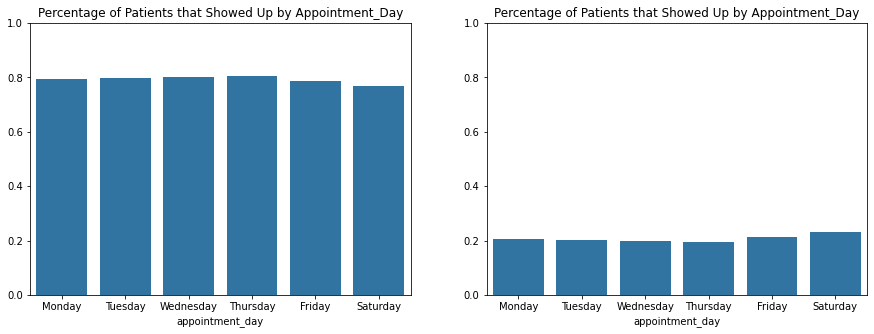

In [100]:
# Appointment_Day_ratio for patient that show up for appointment
appointment_day_ratio = (df_copy[df_copy.no_show == 'No'].groupby(['appointment_day']).size()  / df_copy.groupby(['appointment_day']).size()).sort_values(ascending=False)
# Appointment_Day_ratio for patient that didn't show up for appointment
appointment_day_ratio_Yes = (df_copy[df_copy.no_show == 'Yes'].groupby(['appointment_day']).size()  / df_copy.groupby(['appointment_day']).size()).sort_values(ascending=False)
plt.figure(figsize=(15,5))
# Plot for Appointment_Day_ratio for patient that show up for appointment
plt.subplot(1,2,1)
ax = sns.barplot(x=appointment_day_ratio.index, y=appointment_day_ratio,order=order,color=color)
ax.set_title("Percentage of Patients that Showed Up by Appointment_Day")
ax.set_ylim(0,1)
plt.xticks(rotation=0)

# Plot for Appointment_Day_ratio for patient that didn't show up for appointment
plt.subplot(1,2,2)
ax = sns.barplot(x=appointment_day_ratio_Yes.index, y=appointment_day_ratio_Yes,order=order,color=color)
ax.set_title("Percentage of Patients that Showed Up by Appointment_Day")
ax.set_ylim(0,1)
plt.xticks(rotation=0);

In [101]:
# Appointment_Day_ratio for patient that show up for appointment
appointment_day_ratio

appointment_day
Thursday     0.806459
Wednesday    0.803108
Tuesday      0.799064
Monday       0.793529
Friday       0.787739
Saturday     0.769231
dtype: float64

In [102]:
# Appointment_Day_ratio for patient that show up for appointment
appointment_day_ratio_Yes

appointment_day
Saturday     0.230769
Friday       0.212261
Monday       0.206471
Tuesday      0.200936
Wednesday    0.196892
Thursday     0.193541
dtype: float64

**It shows that for Patients who have appointments scheduled on *Thursday* and *Wednesday* tend to show up a little bit more compared to the rest of the appointment_days.**

**This also proves that appointment_days on *Saturday* have the more no_show by a little value consider its little value count**

### Day Range

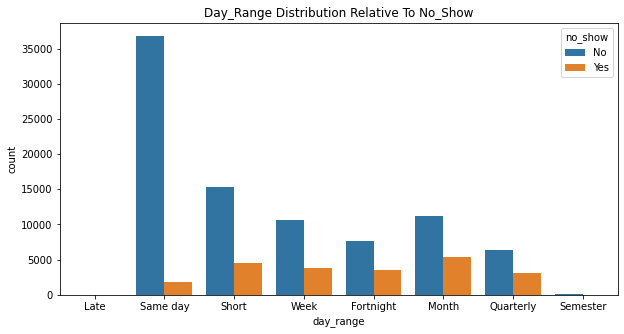

In [103]:
# Plot for Day_Range wrt No_show
plt.figure(figsize=(10,5))
ax=sns.countplot(data=df_copy, x="day_range", hue="no_show")
plt.title('Day_Range Distribution Relative To No_Show');

**It shows that for Patients who book appointments with day_range=*Same Day* have a higher chance of actually showing up for the appointment than those that called in Late or booked on a day_range= *Semester***

**We can see that for Patients who book appointments with day_range=*Month* don't showing up for the appointment**

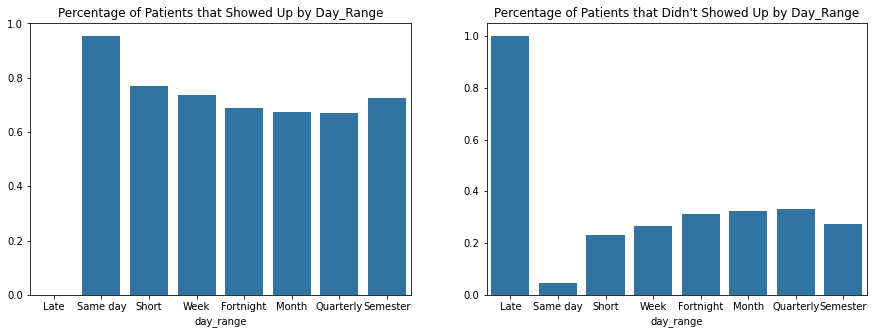

In [104]:
# Day_Range_Ratio for patients that show up for appointment
day_range_ratio = (df_copy[df_copy.no_show == 'No'].groupby(['day_range']).size()  / df_copy.groupby(['day_range']).size()).sort_values(ascending=False)
# Day_Range_Ratio for patients that didn't show up for appointment
day_range_ratio_Yes = (df_copy[df_copy.no_show == 'Yes'].groupby(['day_range']).size()  / df_copy.groupby(['day_range']).size()).sort_values(ascending=False)

plt.figure(figsize=(15,5))

# Plot for Day_Range_Ratio for patients that show up for appointment
plt.subplot(1,2,1)
ax = sns.barplot(x=day_range_ratio.index, y=day_range_ratio, color=color)
ax.set_title("Percentage of Patients that Showed Up by Day_Range")
plt.xticks(rotation=0)

# Plot for Day_Range_Ratio for patients that show up for appointment
plt.subplot(1,2,2)
ax = sns.barplot(x=day_range_ratio_Yes.index, y=day_range_ratio_Yes, color=color)
ax.set_title("Percentage of Patients that Didn't Showed Up by Day_Range")
plt.xticks(rotation=0);

In [105]:
# Day_Range_Ratio for patients that show up for appointment
day_range_ratio

day_range
Same day     0.953531
Short        0.770098
Week         0.735294
Semester     0.726708
Fortnight    0.687746
Month        0.674788
Quarterly    0.668832
Late         0.000000
dtype: float64

In [106]:
# Day_Range_Ratio for patients that show up for appointment
day_range_ratio_Yes

day_range
Late         1.000000
Quarterly    0.331168
Month        0.325212
Fortnight    0.312254
Semester     0.273292
Week         0.264706
Short        0.229902
Same day     0.046469
dtype: float64

**It shows that for Patients who book appointments with day_range= *Same Day* have a higher chance of actually showing up for the appointment than those that called in Late or booked on a day_range= *Quarterly***


## Multivariate Exploration

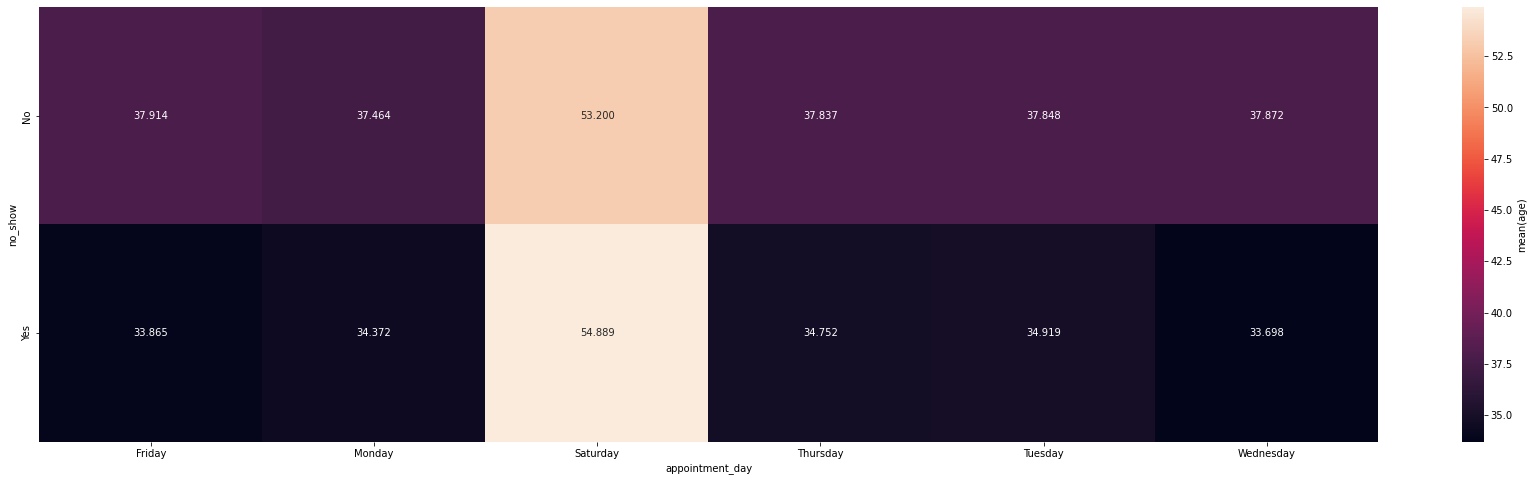

In [107]:
# Relationship between appointment_day and no_show at average with respect to age
cat_means = df_copy.groupby(['appointment_day', 'no_show']).mean()['age']
cat_means = cat_means.reset_index(name = 'age_avg')
cat_means = cat_means.pivot(index = 'no_show', columns = 'appointment_day',
                            values = 'age_avg')
plt.figure(figsize=(30,8))
sns.heatmap(cat_means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(age)'});

**We can observe that by average on appointment_day and no_show, the average age is closer to the mean age whereas *Saturday* has an average age of 53-55 meaning mostly older patient dominate those appountment days**

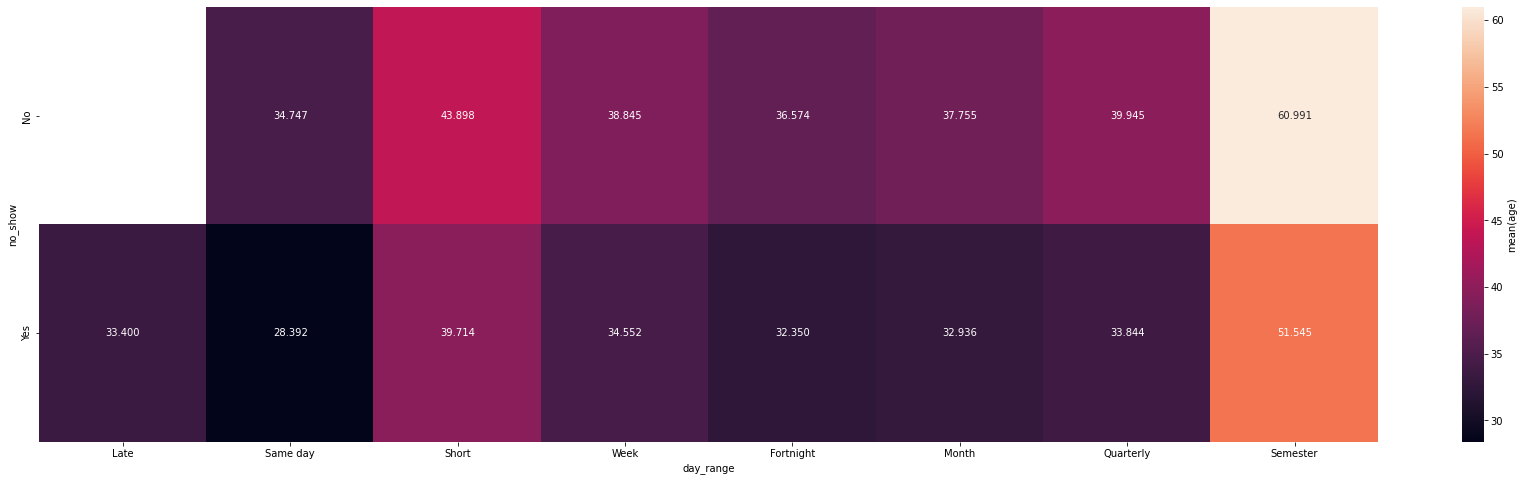

In [108]:
# Relationship between day_range and no_show at average with respect to age
cat_means = df_copy.groupby(['day_range', 'no_show']).mean()['age']
cat_means = cat_means.reset_index(name = 'age_avg')
cat_means = cat_means.pivot(index = 'no_show', columns = 'day_range',
                            values = 'age_avg')
plt.figure(figsize=(30,8))
sns.heatmap(cat_means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(age)'});

**We can observe that the average ages for patients that book appointments on the Same_day and show up 38-35, another unique perspective shows that day_range on Semester is for older individuals with ages ranging 51-61 for those that don't show up for appointment and do**

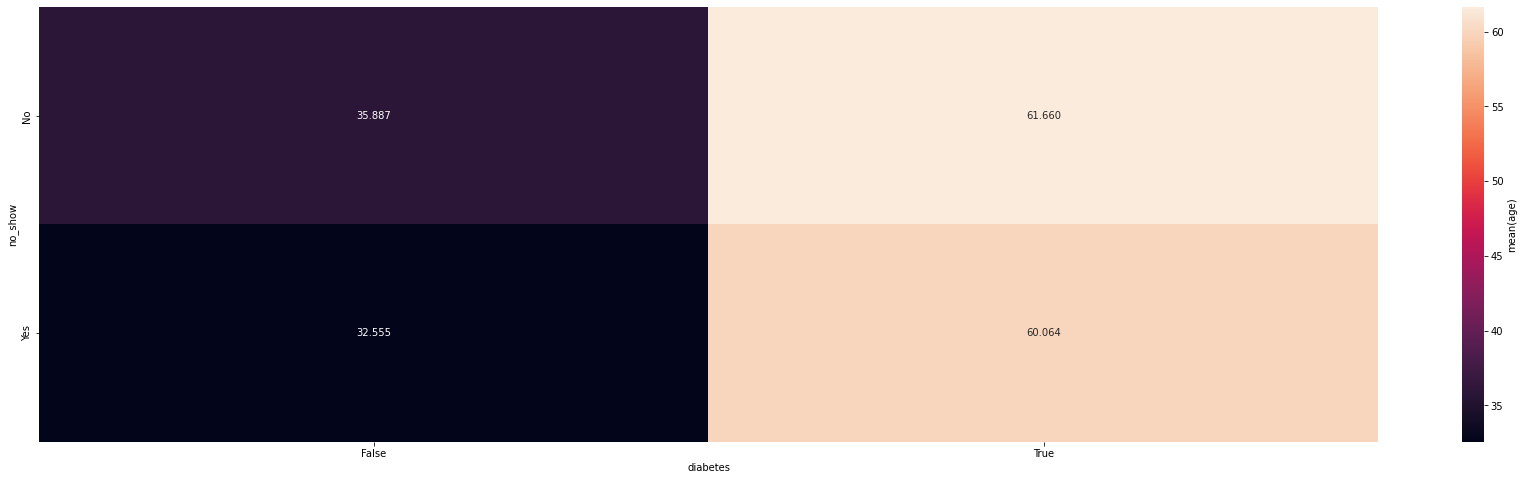

In [109]:
# Relationship between diabetes and no_show at average with respect to age
cat_means = df_copy.groupby(['diabetes', 'no_show']).mean()['age']
cat_means = cat_means.reset_index(name = 'age_avg')
cat_means = cat_means.pivot(index = 'no_show', columns = 'diabetes',values = 'age_avg')
plt.figure(figsize=(30,8))
sns.heatmap(cat_means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(age)'});

**It is obvious that illness like diabetes is unique to certain ages 60-62**

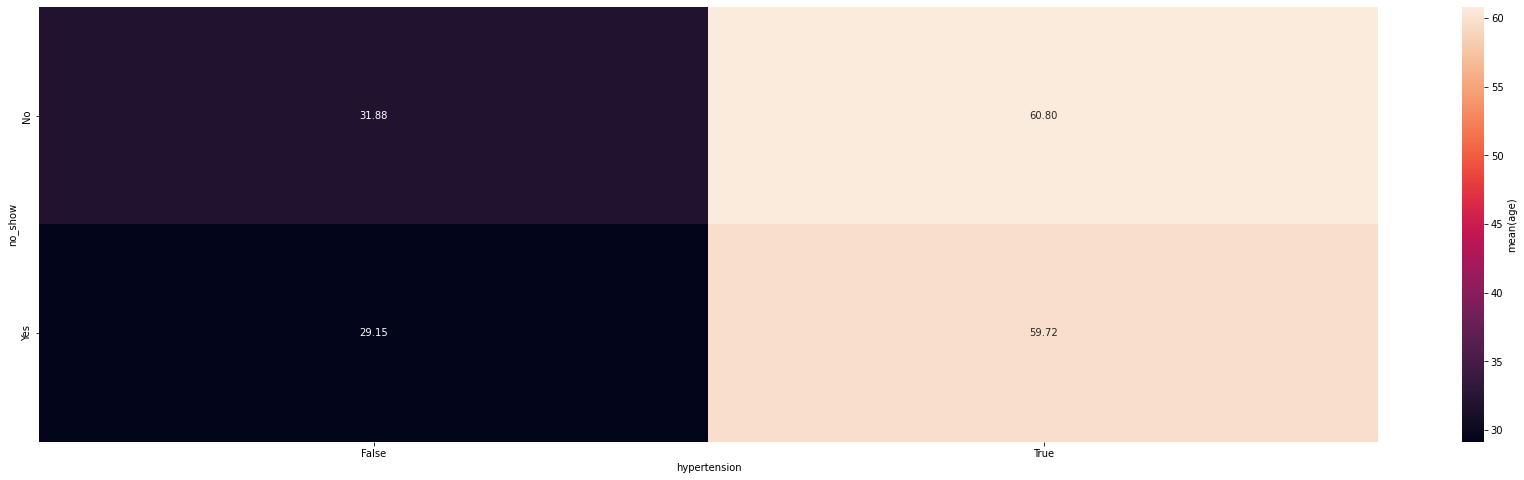

In [110]:
# Relationship between hypertension and no_show at average with respect to age
cat_means = df_copy.groupby(['hypertension', 'no_show']).mean()['age']
cat_means = cat_means.reset_index(name = 'age_avg')
cat_means = cat_means.pivot(index = 'no_show', columns = 'hypertension',values = 'age_avg')
plt.figure(figsize=(30,8))
sns.heatmap(cat_means, annot = True, fmt = '.2f',
           cbar_kws = {'label' : 'mean(age)'});

**Patients with average age 60-61 do show up for medical appointment whereas those that don't show up are a litle younger with range 59-60**

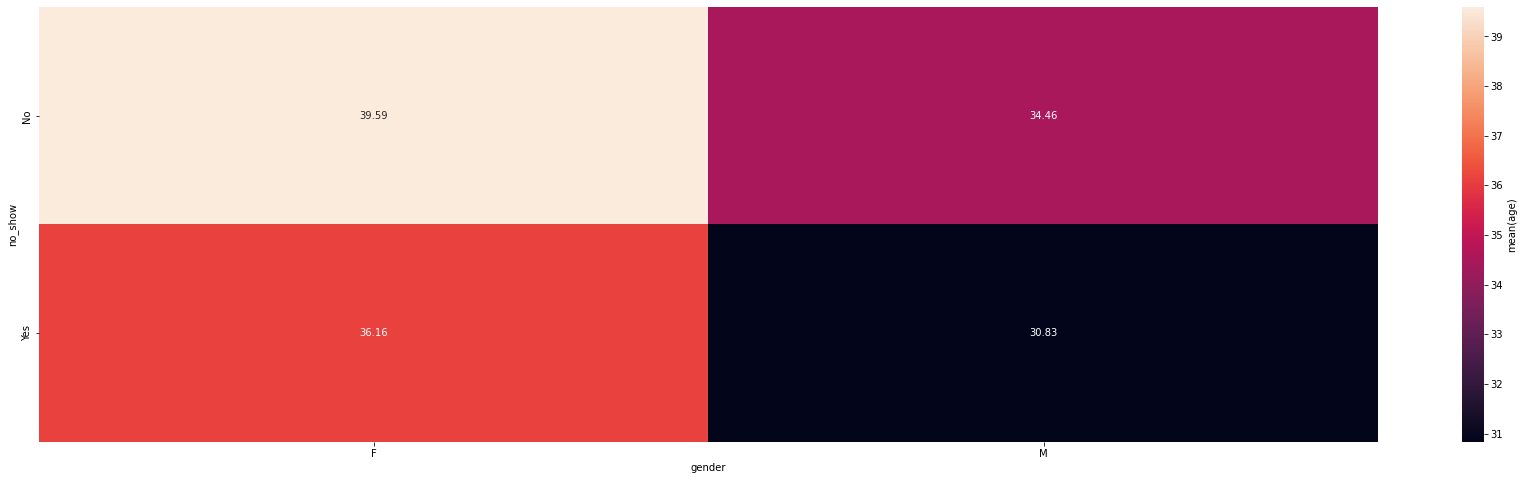

In [111]:
# Relationship between gender and no_show at average with respect to age
cat_means = df_copy.groupby(['gender', 'no_show']).mean()['age']
cat_means = cat_means.reset_index(name = 'age_avg')
cat_means = cat_means.pivot(index = 'no_show', columns = 'gender',values = 'age_avg')
plt.figure(figsize=(30,8))
sns.heatmap(cat_means, annot = True, fmt = '.2f',
           cbar_kws = {'label' : 'mean(age)'});

**We noticed that older females with average age of 39 do show up for medical appointment as opposed to males with average age 34**

**It is observed that certain illness and features are specfic to particular age group with most to older patients(50-61) and the other are focussed on younger patients(34-38).**

<a id='conclusions'></a>
## Conclusions

> I noticed that age and gender plays a bigger role to a patient showing up for medical appointments or not, also hospital location also makes up a significant role to patients showing up as well.

> I noticed that patients that have appointments on weekdays tends to show up more than those that schedule theirs on weekends.

> Day_range like *same_day* has more patients showing up for appointments and mostly comprises of pregnant patient that give birth(age=0).


## Limitation

> There was no appointment methods describe which will better point analysis to which failed or was a success with certain patient age groups.

> It would have been important if feature like doctor's availability would be necessary for patients to tailor their appointments to those time period to increase likely of showing up.

# END